DATA PREPROCESSING

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# Making the 'Tanggal' coloumn as index
weather_df = pd.read_csv('D:\Coding\Repos\Capstone\Cuaca_Semarang\jan2021_may2023.csv', parse_dates=['Tanggal'], index_col='Tanggal')
# Show the first 5 first data
weather_df.head()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
Tanggal,,,,,,,,,
01/01/2021,24.2,30.6,27.2,83.0,3.5,3.0,6,340,2
02/01/2021,25.0,30.8,27.6,81.0,3.0,1.4,4,350,2
03/01/2021,24.8,31.2,27.3,83.0,NaN,3.2,5,40,2
04/01/2021,24.0,31.0,27.7,80.0,1.9,5.8,7,330,2
05/01/2021,24.2,30.6,27.4,81.0,8.0,7.4,8,330,3


In [14]:
# Show The shape of the data
weather_df.shape

(879, 9)

In [4]:
# Change column names
weather_df = weather_df.rename(columns={'Tn' : 'temp_min', 
                                        'Tx' : 'temp_max', 
                                        'Tavg' : 'temp_avg', 
                                        'RH_avg' : 'hum_avg', 
                                        'RR' : 'rain_rate', 
                                        'ss' : 'sunshine', 
                                        'ff_x' : 'windspeed_max', 
                                        'ddd_x' : 'winddir_maxspeed', 
                                        'ff_avg' : 'windspeed_avg'
})

weather_df.head()

,temp_min,temp_max,temp_avg,hum_avg,rain_rate,sunshine,windspeed_max,winddir_maxspeed,windspeed_avg
Tanggal,,,,,,,,,
01/01/2021,24.2,30.6,27.2,83.0,3.5,3.0,6,340,2
02/01/2021,25.0,30.8,27.6,81.0,3.0,1.4,4,350,2
03/01/2021,24.8,31.2,27.3,83.0,NaN,3.2,5,40,2
04/01/2021,24.0,31.0,27.7,80.0,1.9,5.8,7,330,2
05/01/2021,24.2,30.6,27.4,81.0,8.0,7.4,8,330,3


In [5]:
# Check Missing/Null Value
weather_df.isnull().sum()

temp_min             15
temp_max              6
temp_avg             13
hum_avg              13
rain_rate           189
sunshine              3
windspeed_max         0
winddir_maxspeed      0
windspeed_avg         0
dtype: int64

In [6]:
# Search for mean value for every column
avg_temp_min = np.mean(weather_df.temp_min)
avg_temp_max = np.mean(weather_df.temp_max)
avg_temp_avg = np.mean(weather_df.temp_avg)
avg_hum_avg = np.mean(weather_df.hum_avg)
avg_rain_rate = np.mean(weather_df.rain_rate)
avg_sunshine = np.mean(weather_df.sunshine)
avg_windspeed_max = np.mean(weather_df.windspeed_max)
avg_winddir_maxspeed = np.mean(weather_df.winddir_maxspeed)
avg_windspeed_avg = np.mean(weather_df.windspeed_avg)

In [7]:
# Replace the null value as mean value for every column
weather_df['temp_min'] = weather_df['temp_min'].replace(to_replace = np.nan, value = avg_temp_min)
weather_df['temp_max'] = weather_df['temp_max'].replace(to_replace = np.nan, value = avg_temp_max)
weather_df['temp_avg'] = weather_df['temp_avg'].replace(to_replace = np.nan, value = avg_temp_avg)
weather_df['hum_avg'] = weather_df['hum_avg'].replace(to_replace = np.nan, value = avg_hum_avg)
weather_df['rain_rate'] = weather_df['rain_rate'].replace(to_replace = np.nan, value = avg_rain_rate)
weather_df['sunshine'] = weather_df['sunshine'].replace(to_replace = np.nan, value = avg_sunshine)

In [8]:
# Check the null value
weather_df.isnull().sum()

temp_min            0
temp_max            0
temp_avg            0
hum_avg             0
rain_rate           0
sunshine            0
windspeed_max       0
winddir_maxspeed    0
windspeed_avg       0
dtype: int64

In [9]:
# Return the description of the dataframe
weather_df.describe()

,temp_min,temp_max,temp_avg,hum_avg,rain_rate,sunshine,windspeed_max,winddir_maxspeed,windspeed_avg
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,24.746412,32.242726,27.999654,76.590069,8.376667,6.525000,5.957907,227.847554,2.350398
std,0.904474,1.448610,0.986197,6.841808,14.669554,3.068683,1.469292,123.892072,0.627826
min,21.200000,26.700000,24.000000,48.000000,0.000000,0.000000,2.000000,2.000000,1.000000
25%,24.200000,31.400000,27.400000,72.000000,0.000000,4.500000,5.000000,110.000000,2.000000
50%,24.746412,32.200000,28.000000,77.000000,4.600000,7.000000,6.000000,300.000000,2.000000
75%,25.400000,33.200000,28.600000,81.000000,8.376667,9.000000,7.000000,330.000000,3.000000
max,27.800000,36.400000,31.000000,95.000000,171.000000,11.300000,14.000000,360.000000,5.000000


Skewness: -0.13235005454812182
Kurtosis: 0.8310806695537356


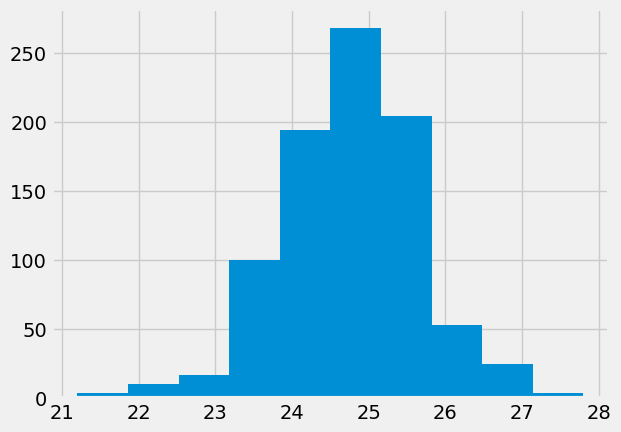

In [25]:
# Show Histogram, skewness, and kurtosis from temp_min
weather_df.temp_min.hist()
print(f"Skewness: {weather_df['temp_min'].skew()}")
print(f"Kurtosis: {weather_df['temp_min'].kurt()}")

Skewness: -0.3641777422408751
Kurtosis: 0.9062098209964597


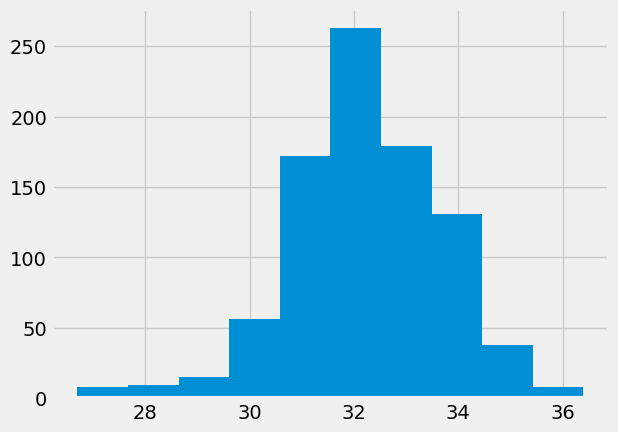

In [26]:
# Show Histogram, skewness, and kurtosis from temp_max
weather_df.temp_max.hist()
print(f"Skewness: {weather_df['temp_max'].skew()}")
print(f"Kurtosis: {weather_df['temp_max'].kurt()}")

Skewness: -0.34077629237609497
Kurtosis: 0.6201700876417982


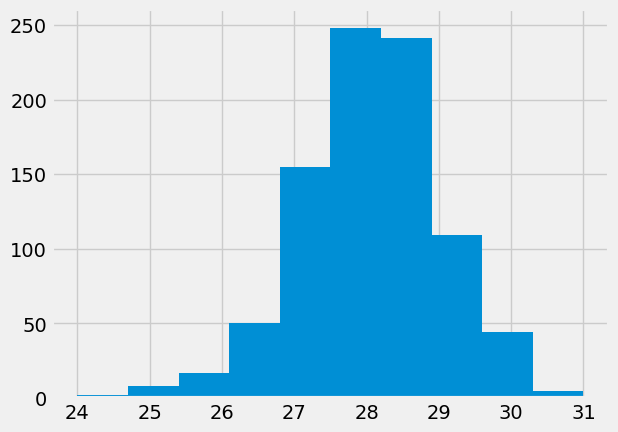

In [27]:
# Show Histogram, skewness, and kurtosis from temp_avg
weather_df.temp_avg.hist()
print(f"Skewness: {weather_df['temp_avg'].skew()}")
print(f"Kurtosis: {weather_df['temp_avg'].kurt()}")

Skewness: -0.43371736345340567
Kurtosis: 0.24753147167269418


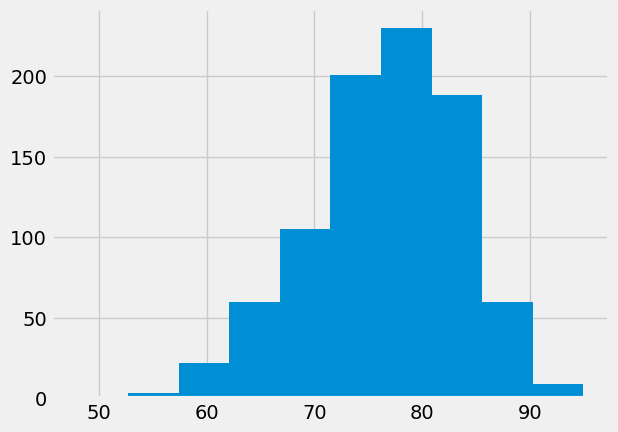

In [28]:
# Show Histogram, skewness, and kurtosis from hum_avg
weather_df.hum_avg.hist()
print(f"Skewness: {weather_df['hum_avg'].skew()}")
print(f"Kurtosis: {weather_df['hum_avg'].kurt()}")

Skewness: 4.604127186984458
Kurtosis: 31.541521469730622


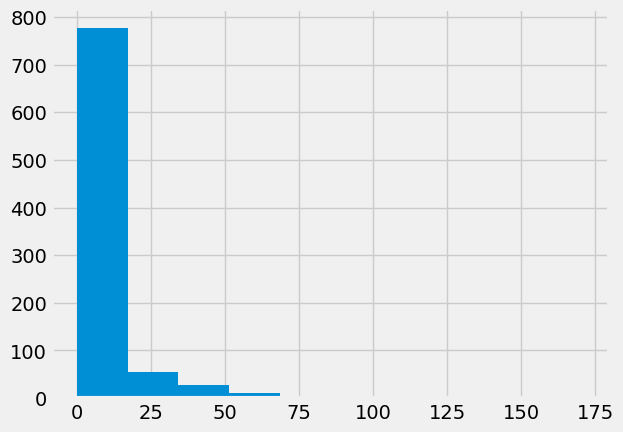

In [29]:
# Show Histogram, skewness, and kurtosiser_df['rain_rate'].kurt()}")

Skewness: -0.5314825984373545
Kurtosis: -0.7185357353828157


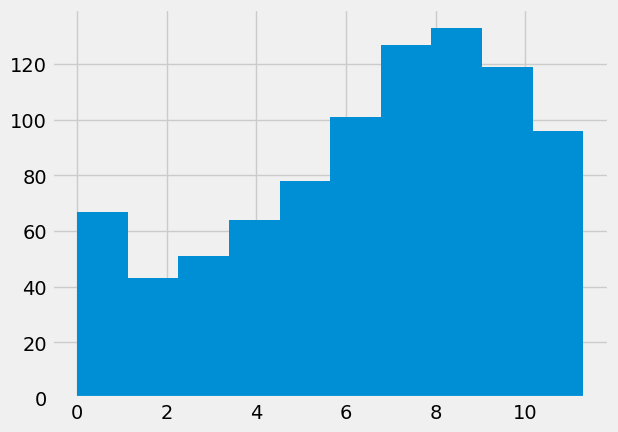

In [30]:
# Show Histogram, skewness, and kurtosis from sunshine
weather_df.sunshine.hist()
print(f"Skewness: {weather_df['sunshine'].skew()}")
print(f"Kurtosis: {weather_df['sunshine'].kurt()}")

Skewness: 1.0661479946569672
Kurtosis: 2.2041379227797053


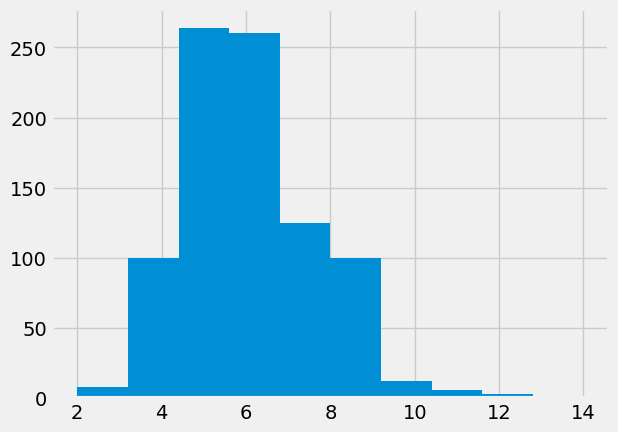

In [31]:
# Show Histogram, skewness, and kurtosis from windspeed_max
weather_df.windspeed_max.hist()
print(f"Skewness: {weather_df['windspeed_max'].skew()}")
print(f"Kurtosis: {weather_df['windspeed_max'].kurt()}")

Skewness: -0.596068738391417
Kurtosis: -1.3590859081366296


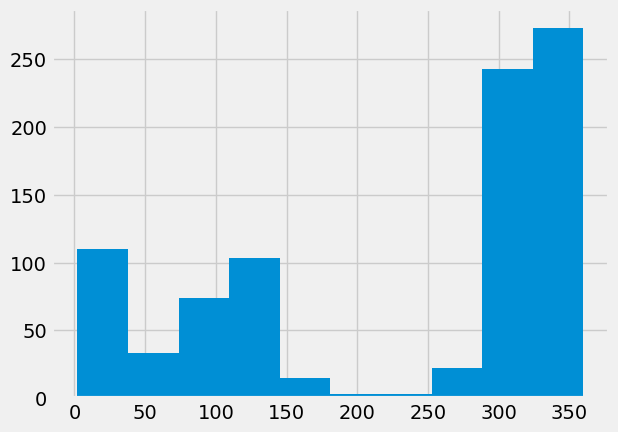

In [32]:
# Show Histogram, skewness, and kurtosis from winddir_maxspeed
weather_df.winddir_maxspeed.hist()
print(f"Skewness: {weather_df['winddir_maxspeed'].skew()}")
print(f"Kurtosis: {weather_df['winddir_maxspeed'].kurt()}")

Skewness: 0.9243823735236549
Kurtosis: 0.8052557227999233


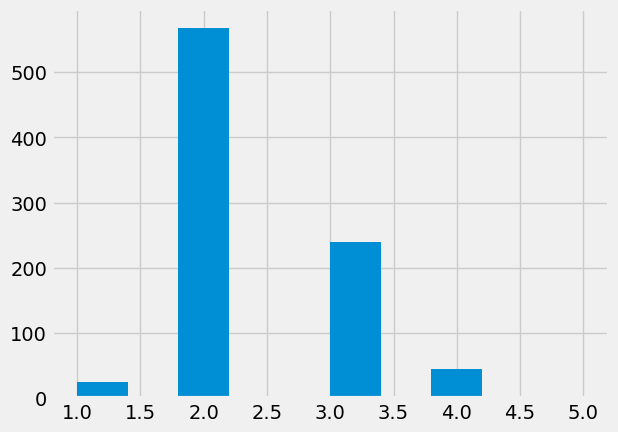

In [33]:
# Show Histogram, skewness, and kurtosis from windspeed_avg
weather_df.windspeed_avg.hist()
print(f"Skewness: {weather_df['windspeed_avg'].skew()}")
print(f"Kurtosis: {weather_df['windspeed_avg'].kurt()}")

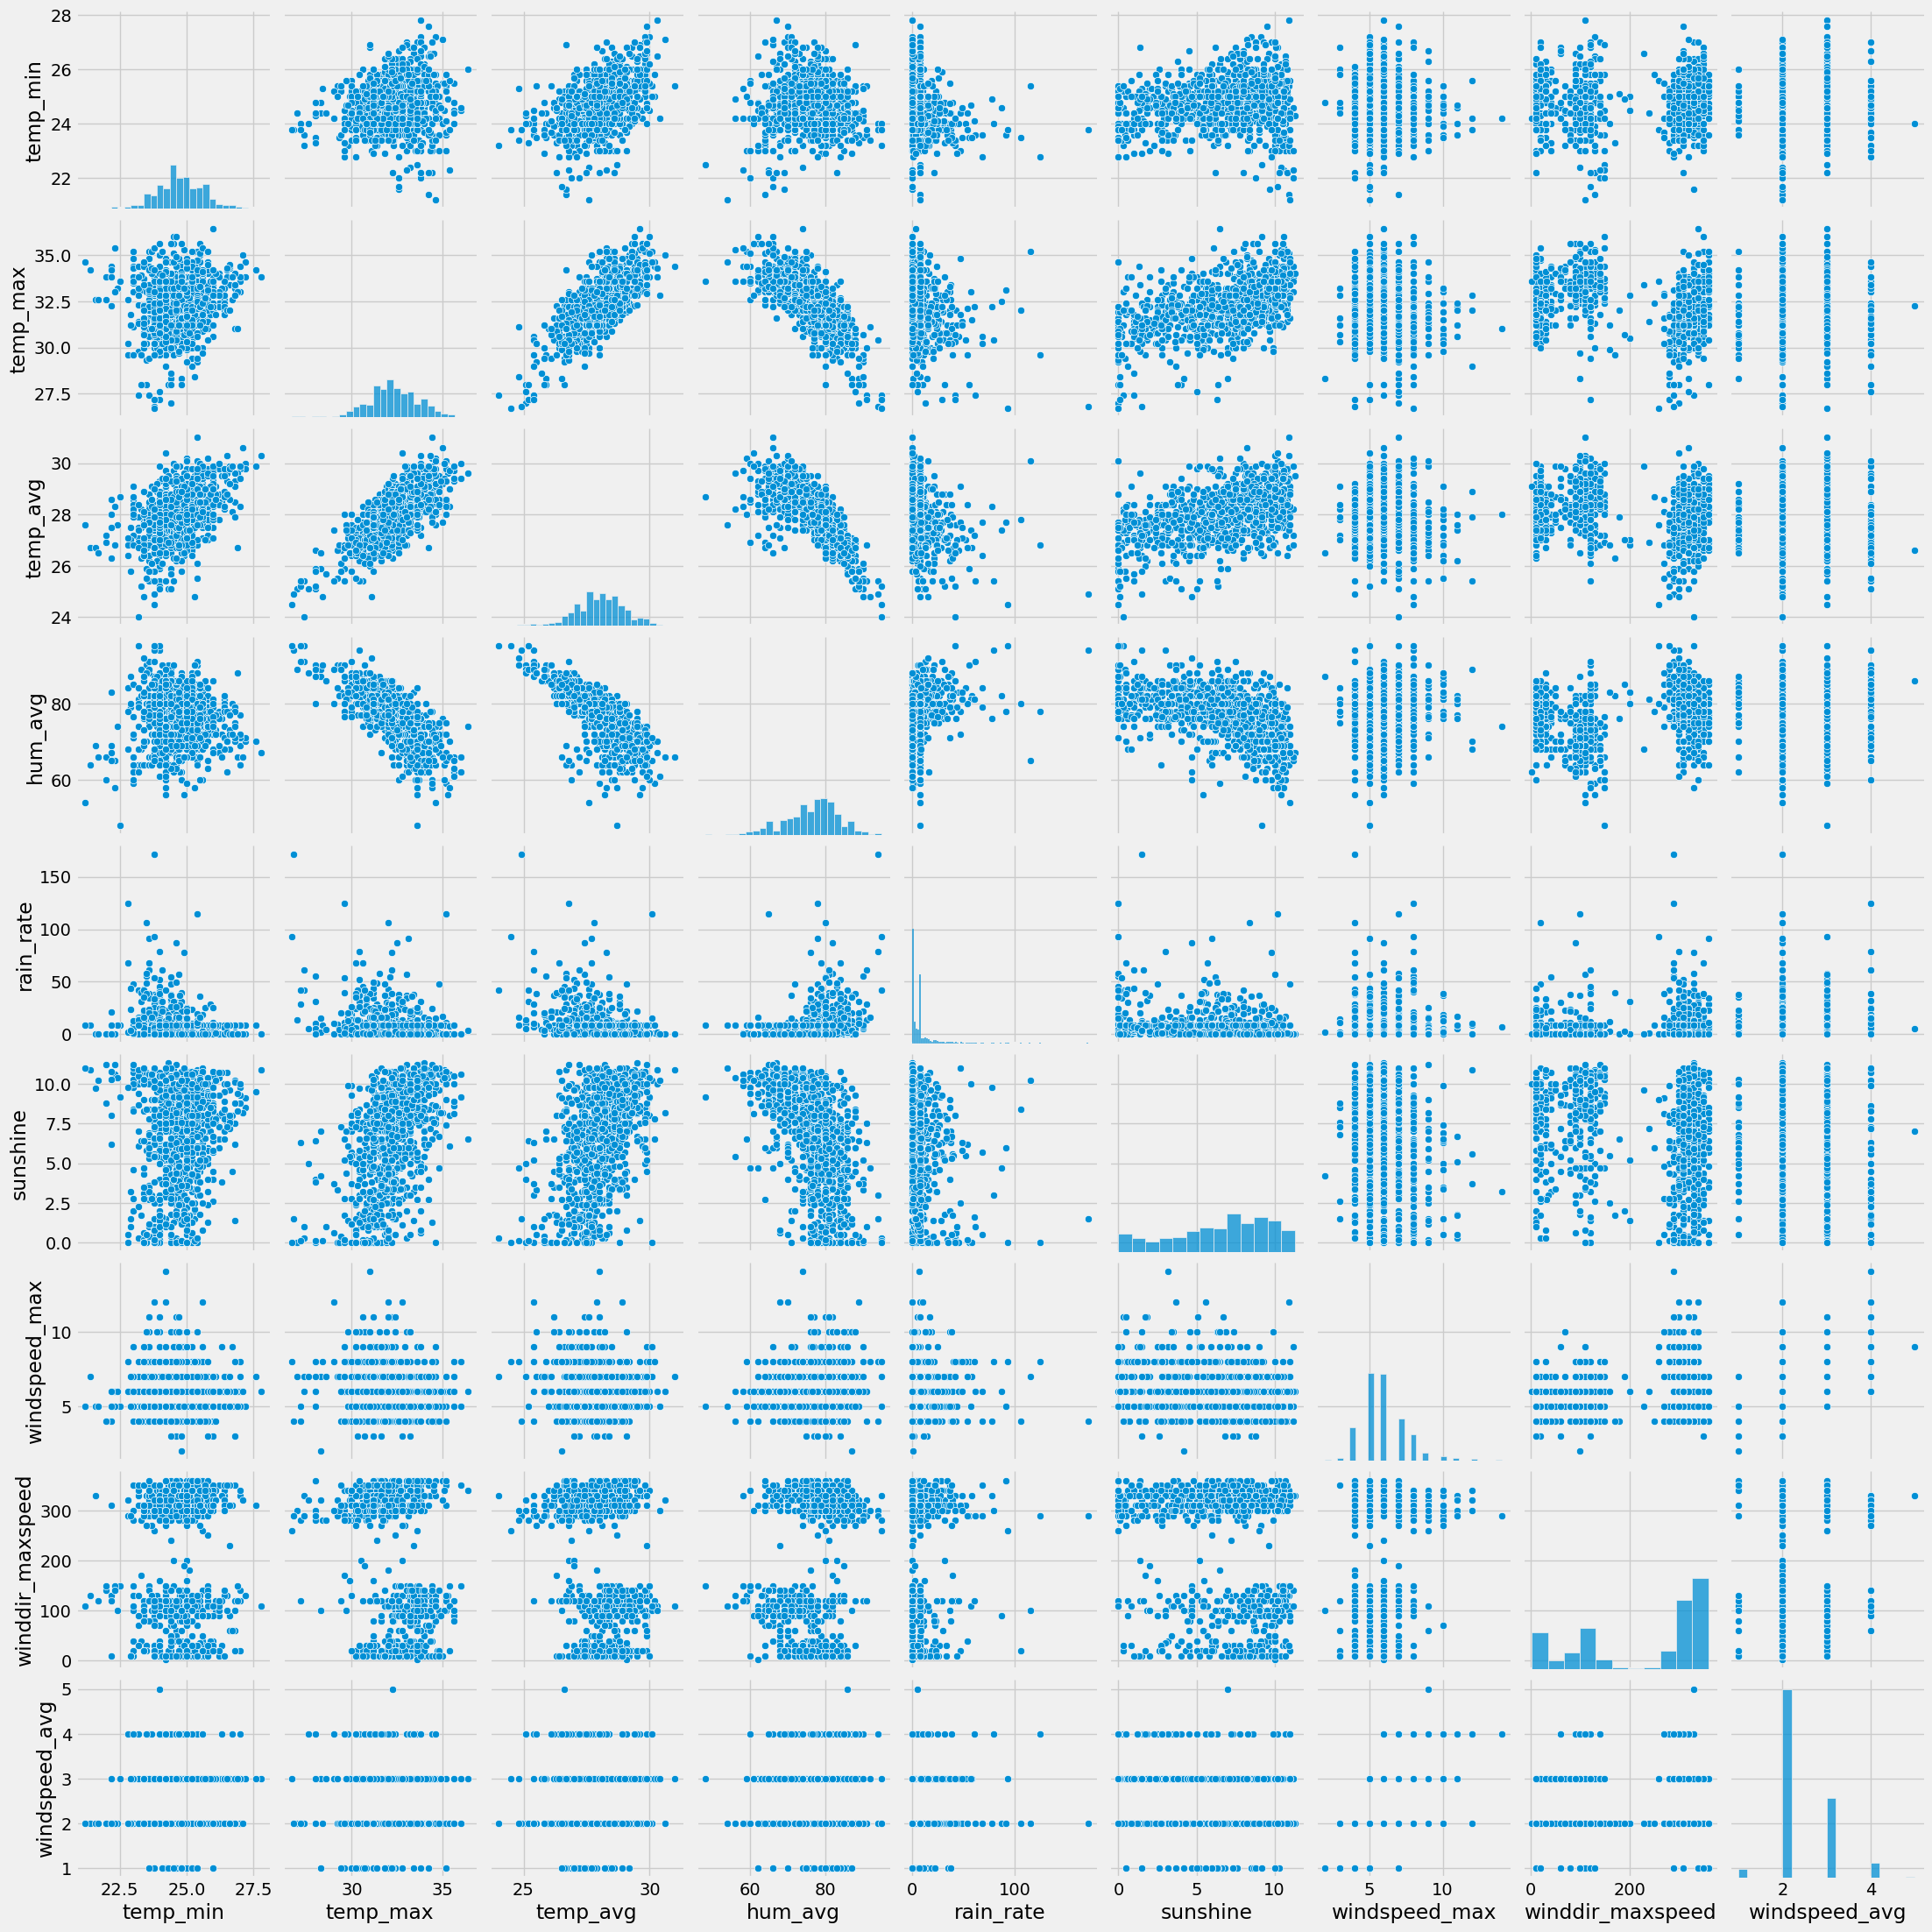

In [34]:
# Show Pairplot of The Data
sns.pairplot(weather_df)

In [10]:
# Find Correlation
weather_df.corr()

,temp_min,temp_max,temp_avg,hum_avg,rain_rate,sunshine,windspeed_max,winddir_maxspeed,windspeed_avg
temp_min,1.000000,0.134905,0.450665,-0.006826,-0.256963,0.146815,-0.057480,-0.004569,0.031364
temp_max,0.134905,1.000000,0.759205,-0.753188,-0.253188,0.517079,-0.098662,-0.318385,0.040571
temp_avg,0.450665,0.759205,1.000000,-0.728525,-0.298456,0.477169,-0.142122,-0.227104,0.054276
hum_avg,-0.006826,-0.753188,-0.728525,1.000000,0.267836,-0.505996,0.128488,0.313705,-0.019083
rain_rate,-0.256963,-0.253188,-0.298456,0.267836,1.000000,-0.203106,0.015925,0.045921,0.029262
sunshine,0.146815,0.517079,0.477169,-0.505996,-0.203106,1.000000,-0.229386,-0.222673,-0.108776
windspeed_max,-0.057480,-0.098662,-0.142122,0.128488,0.015925,-0.229386,1.000000,0.235910,0.611128
winddir_maxspeed,-0.004569,-0.318385,-0.227104,0.313705,0.045921,-0.222673,0.235910,1.000000,0.050048
windspeed_avg,0.031364,0.040571,0.054276,-0.019083,0.029262,-0.108776,0.611128,0.050048,1.000000


<Axes: >

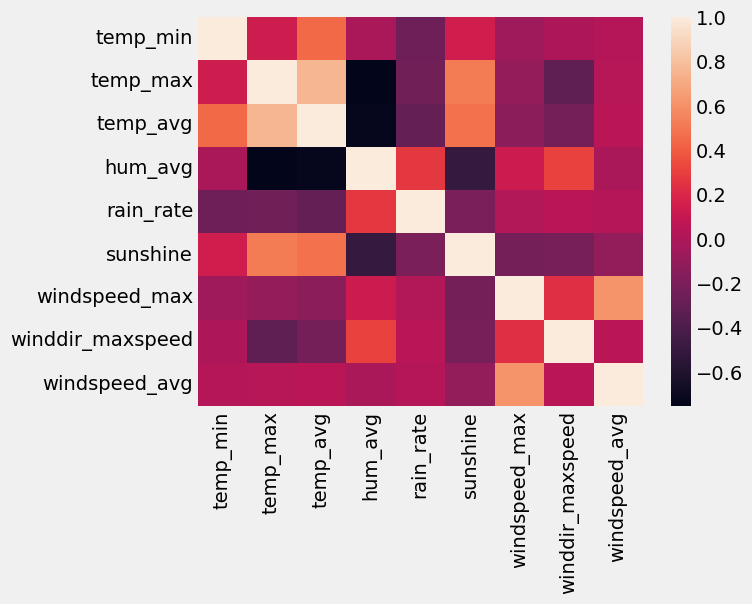

In [12]:
# Show The Heatmap of The Data Correlation
sns.heatmap(weather_df.corr())